In [7]:
import tensorflow as tf;



In [35]:
IMAGE_SIZE = (224, 340)
CROP_SIZE = (224, 224)
BATCH_SIZE = 128

AUTOTUNE = tf.data.AUTOTUNE

#Felipe
#image_train_val = "C:\\Users\\feagm\Desktop\\ENEL_645\\Project\\archive\\"
#image_test = "C:\\Users\\feagm\Desktop\\ENEL_645\\Project\\archive\\test"

#Alex
#image_train_val = "D:\\BreakHis_Dataset\\BreaKHis_v1\\histology_slides\\breast\\all_model_data\\train"
#image_test = "D:\\BreakHis_Dataset\\BreaKHis_v1\\histology_slides\\breast\\all_model_data\\test"

def data_prep_train_val(path,
              image_size,
              crop_size,
              batch_size):
    
    """ 
    This function will take parameters for the datas file path along with the image, crop, and batch size. It will then perform the training
    set's cropping and data augmentation and return the dataset once it is transformed.
    """
    
    crop_layer = tf.keras.layers.CenterCrop(*crop_size)
    augmentation_layer = tf.keras.Sequential([tf.keras.layers.RandomFlip(), tf.keras.layers.RandomRotation((-0.2, 0.2),seed=34), 
                                              tf.keras.layers.RandomContrast(0.1, seed=34)])
    
    
    train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        path, shuffle=True, label_mode='categorical', validation_split=0.15,subset="training",seed=154,
        batch_size=BATCH_SIZE, image_size=IMAGE_SIZE)
    

    validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
        path, shuffle=True, label_mode='categorical', validation_split=0.15,subset="validation",seed=154,
        batch_size=BATCH_SIZE, image_size=IMAGE_SIZE)
    

    train_ds = train_ds.map(lambda image, label: (crop_layer(image, training=True), label),num_parallel_calls=AUTOTUNE)
    train_ds = train_ds.map(lambda image, label: (augmentation_layer(image, training=True), label),num_parallel_calls=AUTOTUNE)

    validation_ds = validation_ds.map(lambda image, label: (crop_layer(image, training=True), label),num_parallel_calls=AUTOTUNE)

    return train_ds.prefetch(buffer_size=AUTOTUNE), validation_ds.prefetch(buffer_size=AUTOTUNE)



def data_prep_test(path,
              image_size,
              crop_size,
              batch_size
              ):     
              
    crop_layer = tf.keras.layers.CenterCrop(*crop_size)
    test_ds = tf.keras.preprocessing.image_dataset_from_directory(
        path, label_mode='categorical', seed=154,
        batch_size=BATCH_SIZE, image_size=IMAGE_SIZE)
    
    test_ds = test_ds.map(lambda image, label: (crop_layer(image, training=True), label),num_parallel_calls=AUTOTUNE)
    return test_ds.prefetch(buffer_size=AUTOTUNE)

In [36]:
train, val= data_prep_train_val("D:\\BreakHis_Dataset\\BreaKHis_v1\\histology_slides\\breast\\all_model_data\\train",IMAGE_SIZE, CROP_SIZE, BATCH_SIZE)


Found 5931 files belonging to 2 classes.
Using 5042 files for training.
Found 5931 files belonging to 2 classes.
Using 889 files for validation.
Found 1978 files belonging to 2 classes.


In [37]:
test = data_prep_test("D:\\BreakHis_Dataset\\BreaKHis_v1\\histology_slides\\breast\\all_model_data\\test",IMAGE_SIZE, CROP_SIZE, BATCH_SIZE)

Found 1978 files belonging to 2 classes.


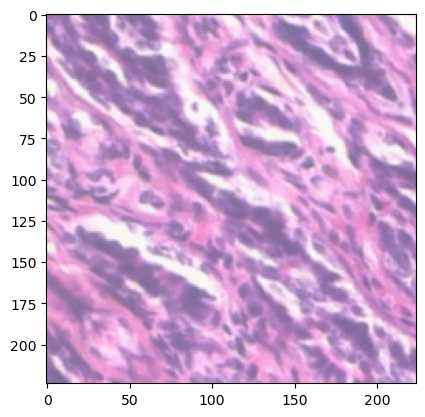

In [34]:
from matplotlib import pyplot as plt
train_batch = train.take(1)

for images, labels in train_batch:
    plt.imshow(images[0].numpy().astype("uint8"))